# Mini Project 1
## Exploratory Data Analysis of Lending Club loan data
### Jack Sticklen
<br> <br>
In this project, the data from the pre-existing csv of lending club loan data will be analysed to provde key insights. As part of this process, the data will first be loaded and cleaned in an appropriate format, then various statistical methods will be applied to explore the data.

In [93]:
# First, import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

%matplotlib inline

In [94]:
# Read the dataset
loan_csv = r'C:\Users\jacks\OneDrive\Documents\Institute of Data\Datasets 2\lending_club_loan_two.csv'
loan = pd.read_csv(loan_csv)

# Display dataframe to check if read correctly
loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [95]:
# Data seems to have been loaded correctly
# Check column info. Open full output in text editor
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Investigate at least one interesting categorical dataset - start from a question
#### Question : over the decade from 2007 to 2016, has the proportion of new debt taken on by non-homeowners increased relative to debt taken on by homeowners? What are some general differences between homeowners and non-homeowners in the data?

Note that none of the debt taken on in this data set is for property purchases

In [96]:
# Drop columns that are of no interest to potential data analysis:
loan = loan.drop(['sub_grade', 'verification_status', 'earliest_cr_line', 
'emp_title', 'dti', 'pub_rec', 'mort_acc', 'address', 'revol_util',
'title', 'pub_rec_bankruptcies'], axis=1)

# Verify with header
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'purpose',
       'open_acc', 'revol_bal', 'total_acc', 'initial_list_status',
       'application_type'],
      dtype='object')

In [97]:
# Import re
import re

In [98]:
# Convert some object rows to floats based on data
# term is an object when it would be better read as float data
# Create function to remove 'months' string from term datapoint
def termtofloat(termdata):
    try: 
        if termdata == np.nan:
            pass
        else:
            # Use re.sub to filter out non-numeric characters
            termdata = re.sub('\D', '', str(termdata))
    except:
        pass
    return termdata

# Apply function to column
loan.term = loan.term.apply(termtofloat)

# Display column to verify
loan.term.head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: object

In [99]:
# Change column type to float
loan.term = loan.term.astype(np.float64)

# Verify
loan.dtypes

loan_amnt              float64
term                   float64
int_rate               float64
installment            float64
grade                   object
emp_length              object
home_ownership          object
annual_inc             float64
issue_d                 object
loan_status             object
purpose                 object
open_acc               float64
revol_bal              float64
total_acc              float64
initial_list_status     object
application_type        object
dtype: object

In [100]:
# Apply method to emp_length
loan.emp_length = loan.emp_length.apply(termtofloat)

# Change column type to float, replace empty strings with null values
loan.emp_length = loan.emp_length.apply( lambda x: np.nan if x == '' else x)
loan.emp_length = loan.emp_length.astype(np.float64)

# Verify
print(loan.emp_length.head())
loan.dtypes

0    10.0
1     4.0
2     1.0
3     6.0
4     9.0
Name: emp_length, dtype: float64


loan_amnt              float64
term                   float64
int_rate               float64
installment            float64
grade                   object
emp_length             float64
home_ownership          object
annual_inc             float64
issue_d                 object
loan_status             object
purpose                 object
open_acc               float64
revol_bal              float64
total_acc              float64
initial_list_status     object
application_type        object
dtype: object

In [101]:
# Convert issue_d from object to datetime
loan.issue_d = pd.to_datetime(loan.issue_d)

# Verify
print(loan.issue_d.head())
loan.dtypes

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2014-11-01
4   2013-04-01
Name: issue_d, dtype: datetime64[ns]


loan_amnt                     float64
term                          float64
int_rate                      float64
installment                   float64
grade                          object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
open_acc                      float64
revol_bal                     float64
total_acc                     float64
initial_list_status            object
application_type               object
dtype: object

In [102]:
# Time to remove null values. check all null value counts in columns
loan.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             18301
home_ownership             0
annual_inc                 0
issue_d                    0
loan_status                0
purpose                    0
open_acc                   0
revol_bal                  0
total_acc                  0
initial_list_status        0
application_type           0
dtype: int64

In [103]:
# For emp_length, replace with mean value
# It is a float value with a distribution, so makes most sense
loan.emp_length.fillna(loan.emp_length.mean(), inplace=True)

# Verify result
loan.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
issue_d                0
loan_status            0
purpose                0
open_acc               0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
dtype: int64

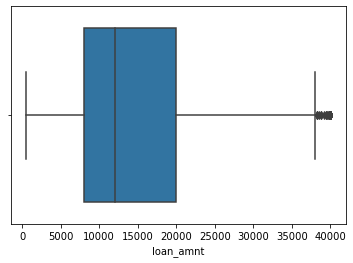

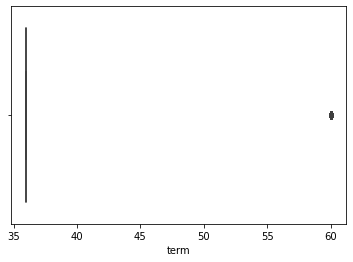

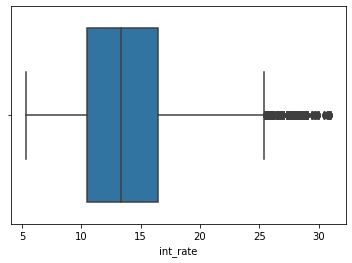

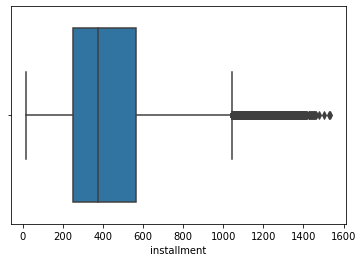

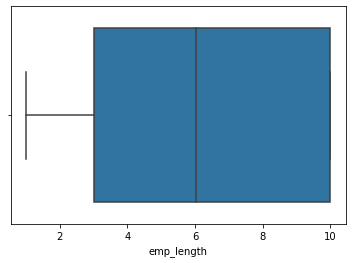

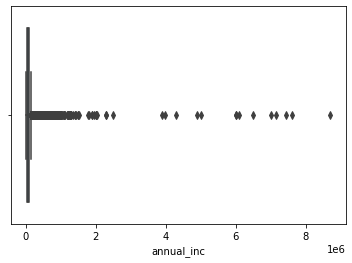

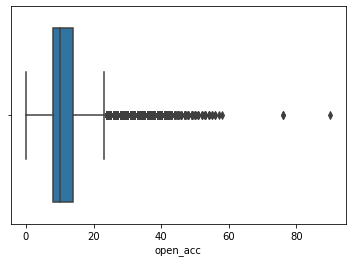

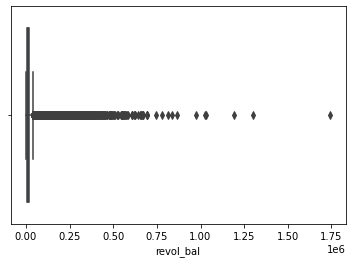

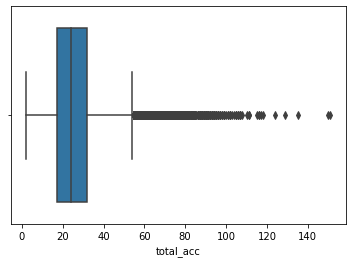

In [104]:
# For most important numerical data, check outliers
for x in (loan.select_dtypes(include=['int64', 'float64']).columns):
    sns.boxplot(loan[x])
    plt.show()

For this analysis, leave outliers in. 
It's important to capture the upper end of the income distribution, which often has a very skewed upper end

In [105]:
# Data wrangling/cleaning complete. Perform EDA
# Re-print head of df
loan.head()



,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,open_acc,revol_bal,total_acc,initial_list_status,application_type
0,10000.0,36.0,11.44,329.48,B,10.0,RENT,117000.0,2015-01-01,Fully Paid,vacation,16.0,36369.0,25.0,w,INDIVIDUAL
1,8000.0,36.0,11.99,265.68,B,4.0,MORTGAGE,65000.0,2015-01-01,Fully Paid,debt_consolidation,17.0,20131.0,27.0,f,INDIVIDUAL
2,15600.0,36.0,10.49,506.97,B,1.0,RENT,43057.0,2015-01-01,Fully Paid,credit_card,13.0,11987.0,26.0,f,INDIVIDUAL
3,7200.0,36.0,6.49,220.65,A,6.0,RENT,54000.0,2014-11-01,Fully Paid,credit_card,6.0,5472.0,13.0,f,INDIVIDUAL
4,24375.0,60.0,17.27,609.33,C,9.0,MORTGAGE,55000.0,2013-04-01,Charged Off,credit_card,13.0,24584.0,43.0,f,INDIVIDUAL


In [106]:
# Check full period over which data has been collected
print(loan.issue_d.min())
print(loan.issue_d.max())

# We want to separate out loan holders into homeowners and non-homeowners.
# Check categories in home_ownership.

loan.home_ownership.value_counts()

2007-06-01 00:00:00
2016-12-01 00:00:00


MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [107]:
# Create new column separating homeowners (MORTGAGE/OWN) and non-homeowners (all others)
home_column = loan.home_ownership == ('MORTGAGE' or 'OWN')

# Add to dataframe
loan['home?'] = home_column

# Display head
loan.head()


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,open_acc,revol_bal,total_acc,initial_list_status,application_type,home?
0,10000.0,36.0,11.44,329.48,B,10.0,RENT,117000.0,2015-01-01,Fully Paid,vacation,16.0,36369.0,25.0,w,INDIVIDUAL,False
1,8000.0,36.0,11.99,265.68,B,4.0,MORTGAGE,65000.0,2015-01-01,Fully Paid,debt_consolidation,17.0,20131.0,27.0,f,INDIVIDUAL,True
2,15600.0,36.0,10.49,506.97,B,1.0,RENT,43057.0,2015-01-01,Fully Paid,credit_card,13.0,11987.0,26.0,f,INDIVIDUAL,False
3,7200.0,36.0,6.49,220.65,A,6.0,RENT,54000.0,2014-11-01,Fully Paid,credit_card,6.0,5472.0,13.0,f,INDIVIDUAL,False
4,24375.0,60.0,17.27,609.33,C,9.0,MORTGAGE,55000.0,2013-04-01,Charged Off,credit_card,13.0,24584.0,43.0,f,INDIVIDUAL,True


In [108]:
# Begin by producing means of numerical (float) data, 
# grouped by home? column

# Describe the dataset
loan.groupby('home?').mean()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,open_acc,revol_bal,total_acc
home?,,,,,,,,,
False,12574.264728,40.704283,13.981200,392.996200,5.374209,64251.604024,10.653732,12697.031025,22.842844
True,15648.341803,42.688487,13.298747,470.572737,6.668747,84121.332831,11.966367,18981.480181,27.978008


In [109]:
# Also produce std
loan.groupby('home?').std()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,open_acc,revol_bal,total_acc
home?,,,,,,,,,
False,7692.776983,9.527485,4.395095,234.399700,3.409653,47801.748215,5.084463,15317.244560,11.536881
True,8704.154909,10.760502,4.522040,260.298549,3.336745,71492.995113,5.106599,24353.266038,11.675264


From the above, it is observed that homeowners generally had higer loan amounts, larger installment payments, longer employment length and higher incomes. However, the standard deviations for these means were large relative to the difference between them, so difficult to say if statistically significant.

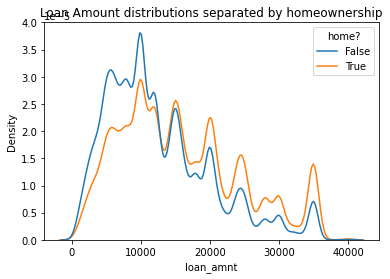

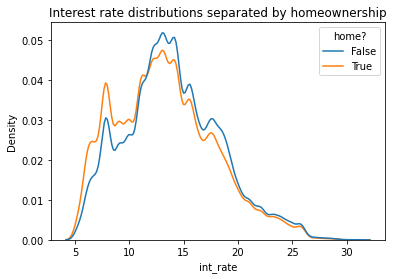

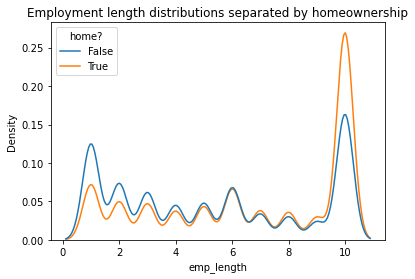

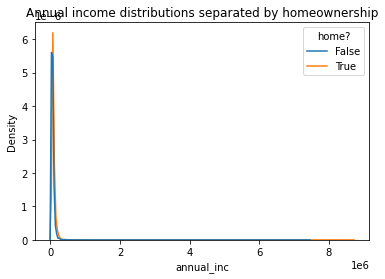

In [110]:
# For above specified data, produce distributions
sns.kdeplot(loan.loan_amnt, hue=loan['home?'])
plt.title('Loan Amount distributions separated by homeownership')
plt.show()

sns.kdeplot(loan.int_rate, hue=loan['home?'])
plt.title('Interest rate distributions separated by homeownership')
plt.show()

sns.kdeplot(loan.emp_length, hue=loan['home?'])
plt.title('Employment length distributions separated by homeownership')
plt.show()

sns.kdeplot(loan.annual_inc, hue=loan['home?'])
plt.title('Annual income distributions separated by homeownership')
plt.show()

For most variables, the homeowner distribution was slightly more leftward skewed than that for non-homeowners. However, this skew heavily influenced the means in annual income due to the presence of very high income earners 

Text(0.5, 1.0, 'heatmap of data correlations for homeowners')

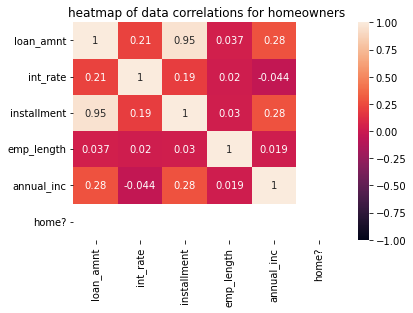

In [111]:
# Also produce a heatmap of the correlations between data
# Drop columns we don't want to look at
corr_loan = loan.drop(['term', 'open_acc', 'revol_bal', 'total_acc'], axis=1)
# For homeownership
sns.heatmap(corr_loan.loc[corr_loan['home?'] == True].corr(), vmin=-1, vmax=1, annot=True)
plt.title('heatmap of data correlations for homeowners')

Text(0.5, 1.0, 'heatmap of data correlations for non-homeowners')

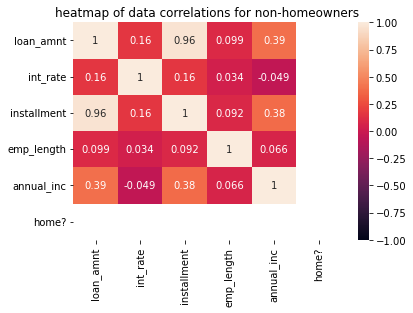

In [112]:
# For non-homeownership
sns.heatmap(corr_loan.loc[corr_loan['home?'] == False].corr(), vmin=-1, vmax=1, annot=True)
plt.title('heatmap of data correlations for non-homeowners')

From the above, it is clear that, for most of the data, correlations between variables for homeowners and non-homeowners remained largely similar in direction/strength. Significant differences included:
<br>
- Stronger relationships between annual_inc and loan_amount/installment for non-homeowners than homeowners - maybe homeowners were able to leverage existing equity to get better loans?
<br><br>
- Slightly weaker correlation between loan amount and interest rate for non-homeowners.

### Investigate at least one interesting categorical dataset - start from a question
#### Question : over the decade from 2007 to 2016, has the proportion of new debt taken on by non-homeowners increased relative to debt taken on by homeowners?

In [113]:
# First: is homeowner debt significantly different from renter debt?
# Test using null hypothesis H0 - homeowner debt is the same as renter debt

# Establish two datasets: homeowners (OWN and MORTGAGE) and renters (RENT)
homeownerdebt = loan.loc[(loan['home_ownership'] == 'OWN') | (loan['home_ownership'] == 'MORTGAGE')].sample(1000)
nonhomeownerdebt = loan.loc[loan['home_ownership'] == 'RENT'].sample(1000)

# Define a and b distributions to test
a = homeownerdebt.loan_amnt
b = nonhomeownerdebt.loan_amnt

In [114]:
# Set alpha as 0.05
alpha = 0.05

# use stats.ttest_ind to determine significance
t, p = stats.ttest_ind(a, b)

print('The t-test value is ', t)
print('\nThe p value is ', p)

The t-test value is  7.571520044717666

The p value is  5.600542637202133e-14


In [115]:
# Accept or reject null hypothesis
if p < alpha:
    print("We reject our null hypothesis.")
elif p > alpha:
    print("We fail to reject our null hypothesis.")
else:
    print("Our test is inconclusive.")

We reject our null hypothesis.


Thus the distributions have been verified as significantly different

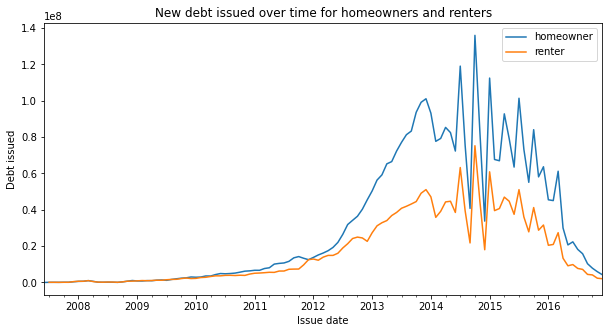

In [116]:
# Plot total loaned quantity for both groups as a timeseries on the same chart

# Create datasets
homeownerdebtfull = loan.loc[(loan['home_ownership'] == 'OWN') | (loan['home_ownership'] == 'MORTGAGE')]
nonhomeownerdebtfull = loan.loc[loan['home_ownership'] == 'RENT']
# Homeowner
debt_over_time_home = homeownerdebtfull.groupby(['issue_d']).loan_amnt.sum()
# Renter
debt_over_time_rent = nonhomeownerdebtfull.groupby(['issue_d']).loan_amnt.sum()

# Plot on same axis, label appropriately
_ = plt.figure(figsize=(10,5))
_ = debt_over_time_home.plot()
_ = debt_over_time_rent.plot()
_ = plt.legend(['homeowner', 'renter'])
_ = plt.title('New debt issued over time for homeowners and renters')
_ = plt.xlabel('Issue date')
_ = plt.ylabel('Debt issued')


Text(0, 0.5, 'Ratio of renter to homeowner debt')

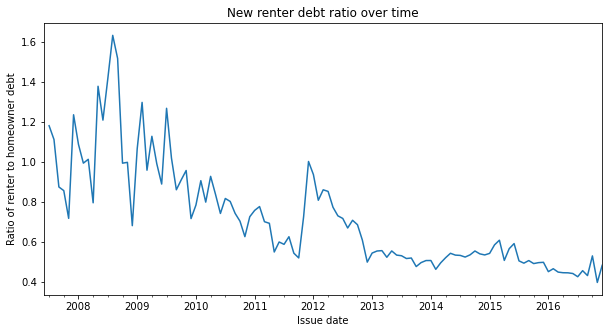

In [117]:
# Combine to create one proportional measure over time
debt_proportion = debt_over_time_rent.divide(debt_over_time_home)

# Plot
plt.figure(figsize=(10,5))
debt_proportion.plot()
plt.title('New renter debt ratio over time')
plt.xlabel('Issue date')
plt.ylabel('Ratio of renter to homeowner debt')

From the first chart above, it can be seen that the amount of homeowner debt and renter debt issued tended to follow similar patterns over time. However, the second chart clearly shows a downwards trend in the relative amount of debt taken on by renters over time - homeowners are dominating the market for debt with this lender. 
<br> <br>
It is unknown how much this difference in demand is driven by changes in the relative amount of homeowners in the wider population.

# END